<p style="display: flex; align-items: center;">
    <img src="https://seaborn.pydata.org/_images/logo-tall-lightbg.svg" alt="Seaborn Logo" width="50" style="margin-right: 10px;">
    <span style="font-size: 32px; font-weight: bold;">📍 Distribution Plots in Seaborn</span>
</p>

## Introduction
Understanding the **distribution of data** is a crucial step in exploratory data analysis (EDA). Seaborn provides several functions to visualize distributions, helping us uncover patterns such as skewness, modality, and outliers.

In this lesson, we'll explore different types of **distribution plots** in Seaborn and how to interpret them effectively.

## Types of Distribution Plots in Seaborn
Seaborn offers several functions to visualize data distributions:

| Plot Type | Description | 
|----------|----------|
| **Histogram** (`sns.histplot`) | Shows the frequency of data points within bins.   | 
| **Kernel Density Estimate (KDE) Plot** (`sns.kdeplot`)  | 	Smooths the distribution into a continuous curve.  | 
| **Empirical Cumulative Distribution Function (ECDF)** (`sns.ecdfplot`)  | 	Displays the cumulative probability of values.  | 
| **Box Plot** (`sns.boxplot`)  | 	Summarizes distributions with quartiles and outliers.  | 
| **Violin Plot** (`sns.violinplot`)  | 	Combines a KDE plot with a box plot for richer distribution insights.  | 

Each of these plots has unique strengths depending on the dataset and the insights needed.

## Loading the Dataset
For this lesson, we will use the `tips` dataset, which contains restaurant bill details, tip amounts, and customer demographics.

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load Tips dataset
tips = sns.load_dataset("tips")

# Display the first few rows
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Histogram
A **histogram** groups data into bins and counts occurrences in each bin, making it a fundamental tool for understanding distributions.

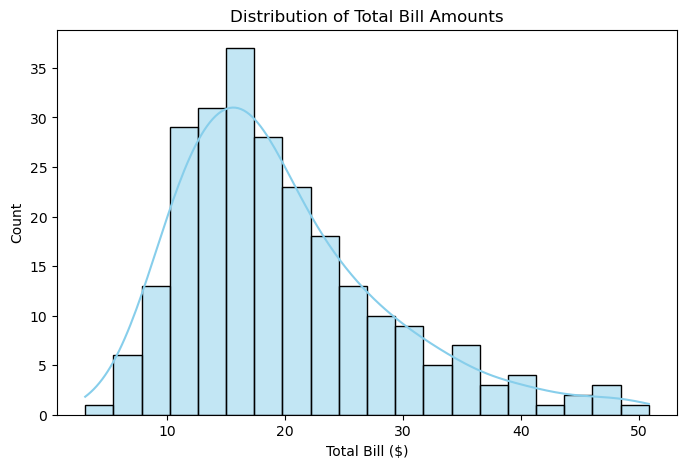

In [29]:
# Sets the current figure size
plt.figure(figsize=(8, 5))

# See: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(
    data=tips,  # Specifies the tips dataset as the data source 
    x="total_bill",  # Uses the total bill column as the x-axis
    bins=20,  # Splits the data into 20 bins (intervals)
    kde=True,  # Adds a Kernel Density Estimate (KDE) curve to show the smoothed distribution
    color="skyblue",  # Changes the bar color for better visibility
)

# Adds a descriptive title
plt.title("Distribution of Total Bill Amounts")

# Adds x- and y-labels
plt.xlabel("Total Bill ($)")
plt.ylabel("Count")

# Shows the plot
plt.show()

This plot helps us see if the **total bill amounts** are normally distributed, skewed, or contain multiple peaks.

## KDE Plot
A **KDE plot** estimates the probability density function of a variable, providing a smooth approximation of the distribution.

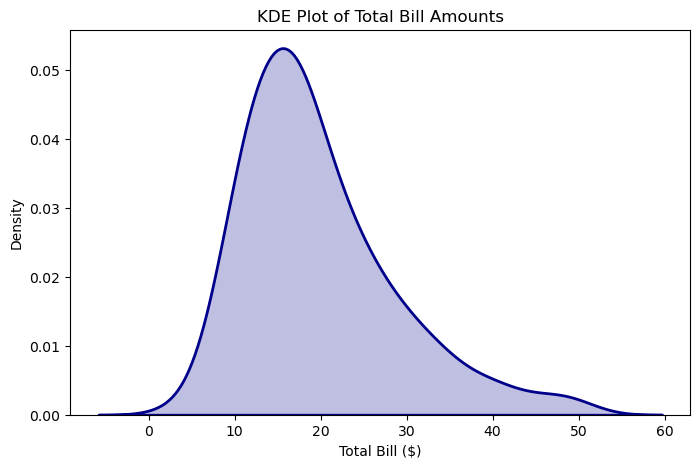

In [30]:
# Sets the current figure size
plt.figure(figsize=(8, 5))

# See: https://seaborn.pydata.org/generated/seaborn.kdeplot.html
sns.kdeplot(
    data=tips,  # Specifies the tips dataset as the data source 
    x="total_bill",  # Uses the total bill column as the x-axis 
    fill=True,  # Shades the area under the curve for better visualization
    color="darkblue",  # Uses a dark blue color for contrast
    linewidth=2,  # Increases line thickness for clarity
)

# Adds a descriptive title
plt.title("KDE Plot of Total Bill Amounts")

# Adds x- and y-labels
plt.xlabel("Total Bill ($)")
plt.ylabel("Density")

# Shows the plot
plt.show()

This plot helps **identify peaks, spread, and skewness** in total bill amounts.

### Overlaying KDE Plots for Comparison
To compare distributions between **smokers and non-smokers**, we can use hue:

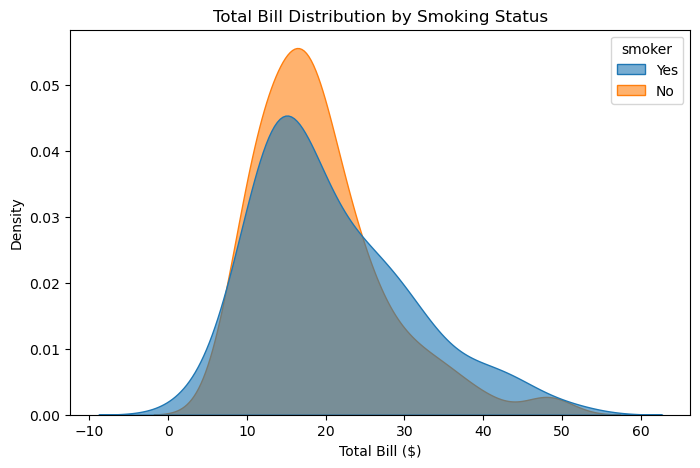

In [31]:
# Sets the current figure size
plt.figure(figsize=(8, 5))

sns.kdeplot(
    data=tips,  # Specifies the tips dataset as the data source  
    x="total_bill",  # Uses the total bill column as the x-axis  
    hue="smoker",  # Splits the distribution by smoking status
    fill=True,  # Shades the area under the curve for better visualization 
    common_norm=False,  # Ensures each group is scaled independently
    alpha=0.6,  # Adjusts transparency for overlap visibility
)

# Adds a descriptive title
plt.title("Total Bill Distribution by Smoking Status")

# Adds x- and y-labels
plt.xlabel("Total Bill ($)")
plt.ylabel("Density")

# Shows the plot
plt.show()

This version allows us to compare how **smokers vs. non-smokers** spend money at the restaurant.

## ECDF Plot
An **Empirical Cumulative Distribution Function (ECDF) plot** shows the proportion of data points that fall below a given value.

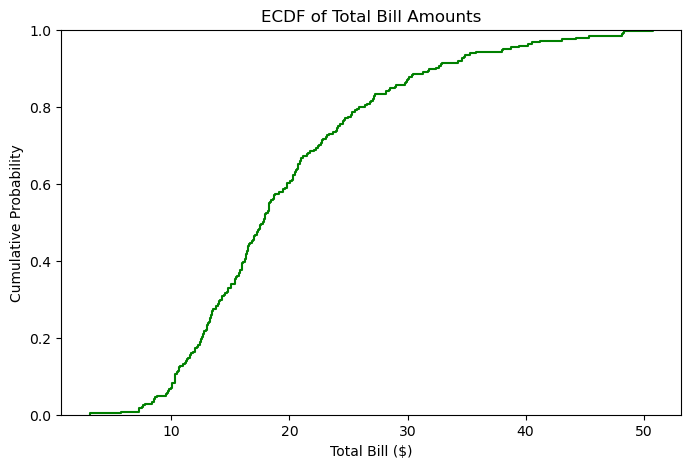

In [32]:
# Sets the current figure size
plt.figure(figsize=(8, 5))

# See: https://seaborn.pydata.org/generated/seaborn.ecdfplot.html
sns.ecdfplot(
    data=tips,  # Specifies the tips dataset as the data source  
    x="total_bill",  # Uses the total bill column as the x-axis  
    color="green",  # Sets the color of the line
)

# Adds a descriptive title
plt.title("ECDF of Total Bill Amounts")

# Adds x- and y-labels
plt.xlabel("Total Bill ($)")
plt.ylabel("Cumulative Probability")

# Shows the plot
plt.show()

**Each point represents an observation in the dataset. The y-axis shows cumulative probability,** making it useful for estimating percentiles.

### Using ECDF Plots to Answer Questions
An **ECDF plot** is particularly useful for estimating percentiles. For example, we can determine the total bill amount that 50% of customers paid less than.

In the following plot, we add a **horizontal line at 0.5 (the 50th percentile)** and a **vertical line at the corresponding total bill amount**.

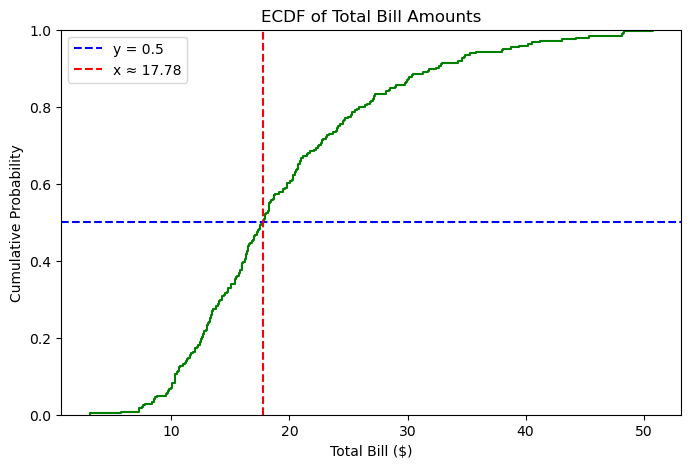

In [36]:
# Sets the current figure size
plt.figure(figsize=(8, 5))

# See: https://seaborn.pydata.org/generated/seaborn.ecdfplot.html
ecdf_plot = sns.ecdfplot(
    data=tips,  # Specifies the tips dataset as the data source  
    x="total_bill",  # Uses the total bill column as the x-axis  
    color="green",  # Sets the color of the line
)

# Extracts ECDF data from the plotted line
lines = ecdf_plot.get_lines()[0]  # Gets the ECDF line object
x_data = lines.get_xdata()  # X values (sorted total_bill values)
y_data = lines.get_ydata()  # Y values (cumulative probabilities)

# Specifies either x_line or y_line (not both)
x_line = None  # Example: Draws a vertical line at total bill = 20
y_line = 0.5  # Example: Draws a horizontal line at cumulative probabilty = 0.5. Set this to None if using x_line

if x_line is not None and y_line is not None:
    print("Only specify one of x_line or y_line. Prioritizing x_line.")
    y_line = None  # Ignores y_line if both are set

# Tracks if we add any lines
line_added = False

# Computes and plots only one of x_line or y_line
if x_line is not None:
    y_interp = np.interp(x_line, x_data, y_data)  # Finds corresponding y-value
    plt.axvline(x=x_line, color="red", linestyle="--", label=f"x = {x_line}")
    plt.axhline(y=y_interp, color="blue", linestyle="--", label=f"y ≈ {y_interp:.2f}")  
    line_added = True

elif y_line is not None:
    x_interp = np.interp(y_line, y_data, x_data)  # Finds corresponding x-value
    plt.axhline(y=y_line, color="blue", linestyle="--", label=f"y = {y_line}")
    plt.axvline(x=x_interp, color="red", linestyle="--", label=f"x ≈ {x_interp:.2f}")
    line_added = True

# Adds a descriptive title
plt.title("ECDF of Total Bill Amounts")

# Adds x- and y-labels
plt.xlabel("Total Bill ($)")
plt.ylabel("Cumulative Probability")

# Only shows legend if at least one line was added
if line_added:
    plt.legend()

# Shows the plot
plt.show()

#### Explanation
- The **ECDF curve** represents the cumulative distribution of total bill amounts.

- A **horizontal dashed blue line** at **y = 0.5** (50% cumulative probability) helps us find the median.

- A **vertical red dashed line** at the corresponding x-value shows the bill amount that 50% of customers paid less than. In this case, we can answer the question and state that **50% of the customers paid less than \$17.78.**

- The `np.interp()` function helps us find the exact bill amount where the ECDF reaches 50%.

This method can be extended to estimate other percentiles, such as the **25th percentile (Q1)** or the **90th percentile** for business insights.

## Box Plot
A **box plot** summarizes the distribution using quartiles and highlights potential outliers.

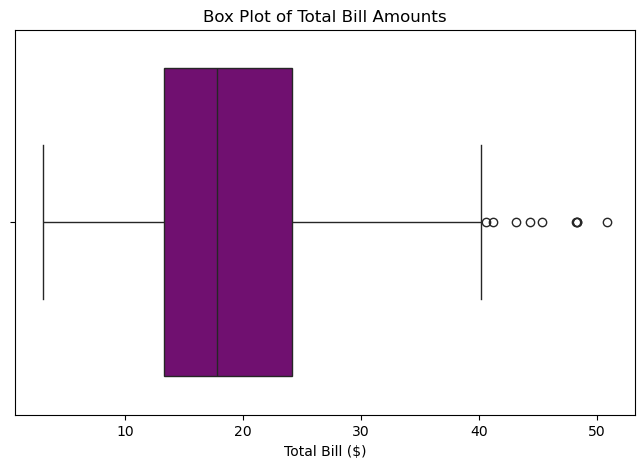

In [37]:
# Sets the current figure size
plt.figure(figsize=(8, 5))

# See: https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(
    data=tips,  # Specifies the tips dataset as the data source  
    x="total_bill",  # Uses the total bill column as the x-axis  
    color="purple",  # Sets the color of the box
)

# Adds a descriptive title
plt.title("Box Plot of Total Bill Amounts")

# Adds x-label
plt.xlabel("Total Bill ($)")

# Shows the plot
plt.show()

#### Explanation:
- **The box represents the interquartile range (IQR)** (middle 50% of data).

- **The line inside the box is the median** (50th percentile).

- **Whiskers extend to the smallest/largest non-outlier points.**

- **Dots beyond the whiskers indicate outliers.**

As we saw in a previous lesson, we can also compare distributions across groups:

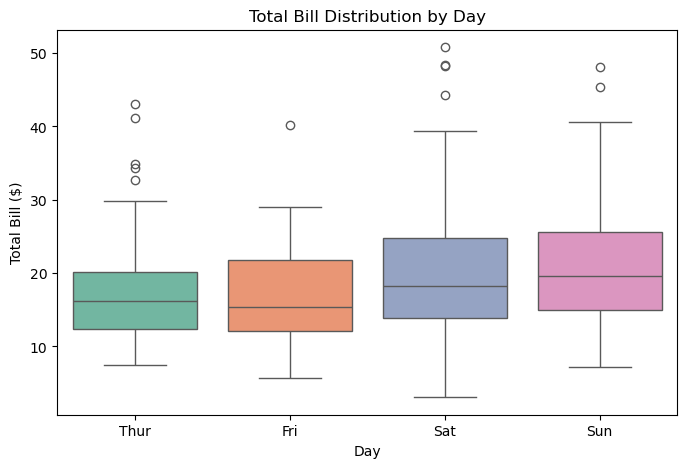

In [38]:
# Sets the current figure size
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=tips,  # Specifies the tips dataset as the data source 
    x="day",  # Uses the day column as the categorical x-axis  
    y="total_bill",  # Uses the total bill column as the numerical y-axis 
    hue="day",  # Colors the boxes based on the day 
    palette="Set2",  # Sets the color palette
)

# Adds a descriptive title
plt.title("Total Bill Distribution by Day")

# Adds x- and y-labels
plt.xlabel("Day")
plt.ylabel("Total Bill ($)")

# Shows the plot
plt.show()

This allows us to check **which days have higher median spending** and **which have more outliers.**

## Violin Plot
A **violin plot** combines aspects of a **box plot** and a **KDE plot**, showing both summary statistics and density distribution.

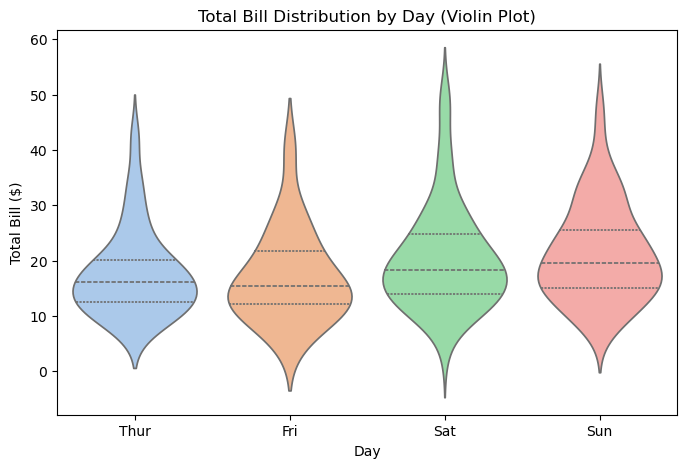

In [39]:
# Sets the current figure size
plt.figure(figsize=(8, 5))

# See: https://seaborn.pydata.org/generated/seaborn.violinplot.html
sns.violinplot(
    data=tips,  # Specifies the tips dataset as the data source 
    x="day",  # Uses the day column as the categorical x-axis  
    y="total_bill",  # Uses the total bill column as the numerical y-axis 
    inner="quartile",  # Draws lines inside the violin at the 25th, 50th (median), and 75th percentiles
    hue="day",  # Colors the violins based on the day 
    palette="pastel",  # Sets the color palette
)

# Adds a descriptive title
plt.title("Total Bill Distribution by Day (Violin Plot)")

# Adds x- and y-labels
plt.xlabel("Day")
plt.ylabel("Total Bill ($)")

# Shows the plot
plt.show()

**The width of the violin represents density**, helping visualize where most values are concentrated. This plot is useful for understanding **skewness, modality, and variance** across different categories.

## 5.1 Quick Challenge
Modify the code below by:

1. **Changing the plot type** from `sns.histplot` to `sns.violinplot`.

2. **Using** `hue="sex"` to compare distributions by gender.

3. **Adding** `split=True` to separate the two groups inside each violin.

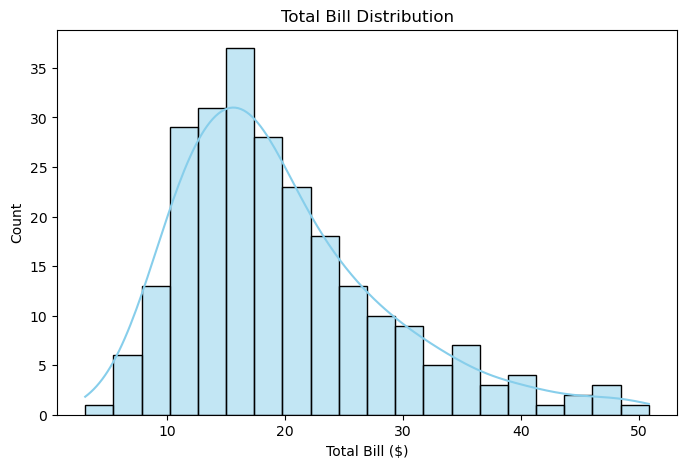

In [40]:
# Sets the current figure size
plt.figure(figsize=(8, 5))

sns.histplot(  # TODO: Modify this line
    data=tips,  # Specifies the tips dataset as the data source 
    x="total_bill",  # Uses the total bill column as the x-axis
    bins=20,  # Splits the data into 20 bins (intervals)
    kde=True,  # Adds a Kernel Density Estimate (KDE) curve to show the smoothed distribution
    color="skyblue",  # Changes the bar color for better visibility
)  

# Adds a descriptive title
plt.title("Total Bill Distribution")

# Adds x- and y-labels
plt.xlabel("Total Bill ($)")
plt.ylabel("Count")

# Shows the plot
plt.show()

💡 **Bonus:** Try using `hue="smoker"` to analyze tipping behavior based on smoking status.